In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="white")

In [148]:
cardio_data = pd.read_csv('../Data/cardio_train.csv', sep=';')
cardio_data.dropna(inplace=True)
cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Exercise 1

### 1.1

a)

In [149]:
cardio = pd.value_counts(cardio_data['cardio'] == 1)

cardio = pd.DataFrame({'cardio': cardio.index, 'values': cardio.values})
cardio

/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_17592/1984958856.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cardio = pd.value_counts(cardio_data['cardio'] == 1)


,cardio,values
0,False,35021
1,True,34979


b)

In [150]:
cholestrol = pd.value_counts(cardio_data['cholesterol'])
cholestrol = pd.DataFrame({'cholestrol': cholestrol.index, 'values': cholestrol.values})
cholestrol

/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_17592/3106194283.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cholestrol = pd.value_counts(cardio_data['cholesterol'])


,cholestrol,values
0,1,52385
1,2,9549
2,3,8066


/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_17592/4246118651.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ages = pd.value_counts(ages_in_years)


Text(0, 0.5, 'Number of people')

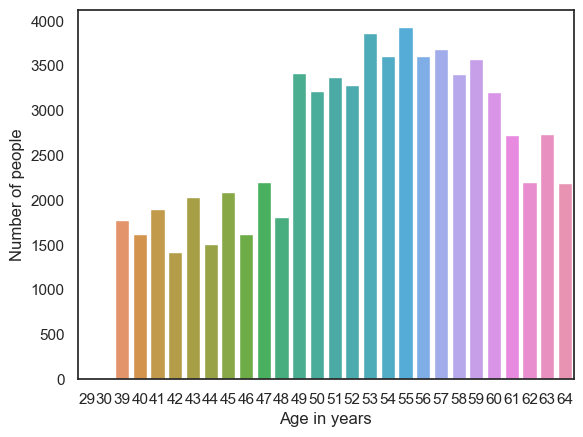

In [151]:
ages_in_years = cardio_data['age'] // 365

ages = pd.value_counts(ages_in_years)
figure = sns.barplot(x=ages.index, y=ages.values)
figure.set_xlabel('Age in years')
figure.set_ylabel('Number of people')

In [152]:
smokers = pd.value_counts(cardio_data['smoke'])
smokers

/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_17592/2913813338.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  smokers = pd.value_counts(cardio_data['smoke'])


smoke
0    63831
1     6169
Name: count, dtype: int64

/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_17592/2200919804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(weight_distribution, kde=False, bins=40)


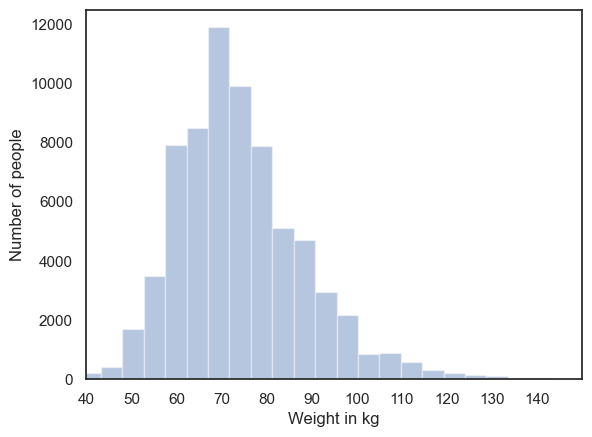

In [153]:
weight_distribution = cardio_data['weight']
figure = sns.distplot(weight_distribution, kde=False, bins=40)
figure.set_xlim(40, 150)
figure.set_xlabel('Weight in kg')
figure.set_ylabel('Number of people')
figure.set_xticks(np.arange(40, 150, 10))

/var/folders/qs/52nq18yx781_kc58fhrjc7n00000gn/T/ipykernel_17592/3156829219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(length_distribution, kde=False, bins=40)


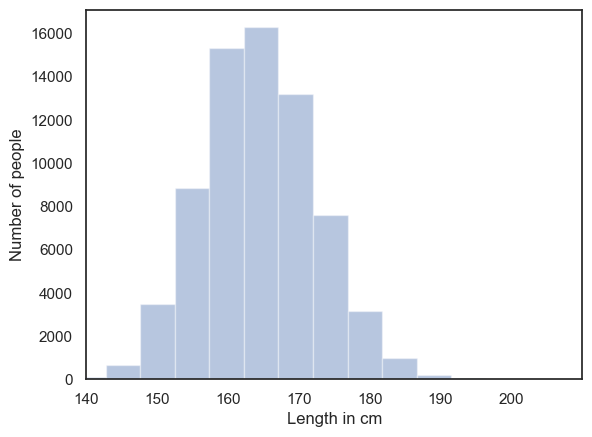

In [154]:
length_distribution = cardio_data['height']
figure = sns.distplot(length_distribution, kde=False, bins=40)
figure.set_xlim(140, 210)
figure.set_xlabel('Length in cm')
figure.set_ylabel('Number of people')
figure.set_xticks(np.arange(140, 210, 10))

In [155]:
female_cardio = cardio_data.groupby("gender").get_group(1)["cardio"].value_counts('cardio')
male_cardio = cardio_data.groupby("gender").get_group(2).value_counts("cardio")
male_cardio

cardio
1    12363
0    12107
Name: count, dtype: int64

<Axes: >

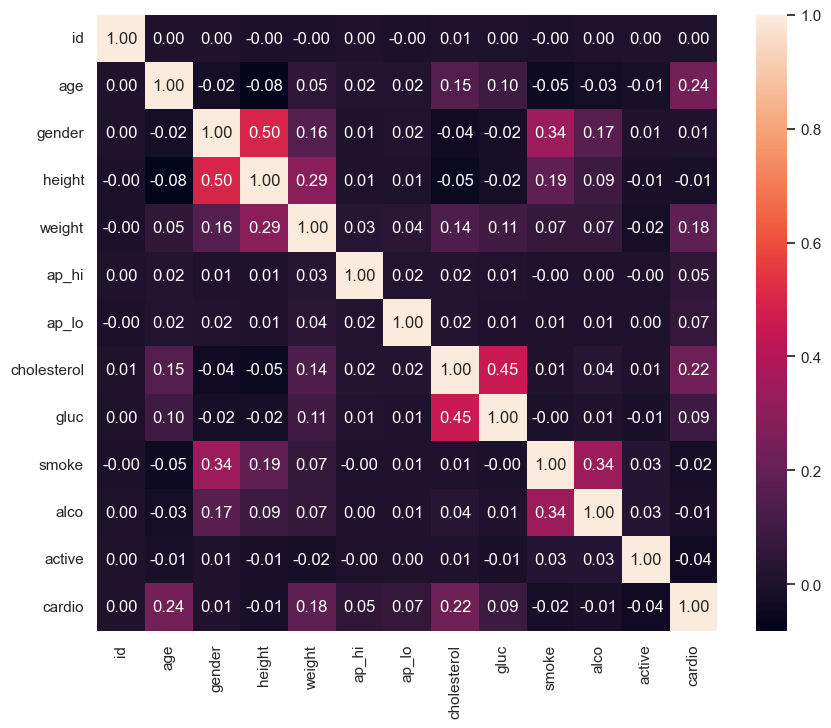

In [156]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cardio_data.corr(), annot=True, fmt=".2f")

In [157]:
# cardio_data.drop(['gender', 'cardio'], axis=1, inplace=True)
# cardio_data

In [158]:
bmi = cardio_data['weight'] / ((cardio_data['height'] / 100) ** 2)
bmi = pd.DataFrame({'bmi': bmi})

count_bmi_under_15 = bmi[bmi['bmi'] < 15].count()
count_bmi_over_100 = bmi[bmi['bmi'] > 100].count()

print(count_bmi_under_15)
print(count_bmi_over_100)


bmi    27
dtype: int64
bmi    29
dtype: int64


In [159]:
cardio_data = pd.concat([cardio_data, bmi], axis=1)
cardio_data = cardio_data[(cardio_data['bmi'] >= 15) & (cardio_data['bmi'] <= 100)]
cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [160]:
cardio_data.drop(['bmi'], axis=1, inplace=True)
bmi_categorical = pd.cut(bmi['bmi'], bins=[18.5, 25, 30, 35, 40, 100], labels=[1, 2, 3, 4, 5])
bmi_categorical = pd.DataFrame({'bmi': bmi_categorical})
cardio_data = pd.concat([cardio_data, bmi_categorical], axis=1)
cardio_data.dropna(inplace=True)

In [161]:
cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,1
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,3
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,1
3,3.0,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,2
4,4.0,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993.0,19240.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,2
69996,99995.0,22601.0,1.0,158.0,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0,5
69997,99996.0,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,3
69998,99998.0,22431.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,2


<Axes: >

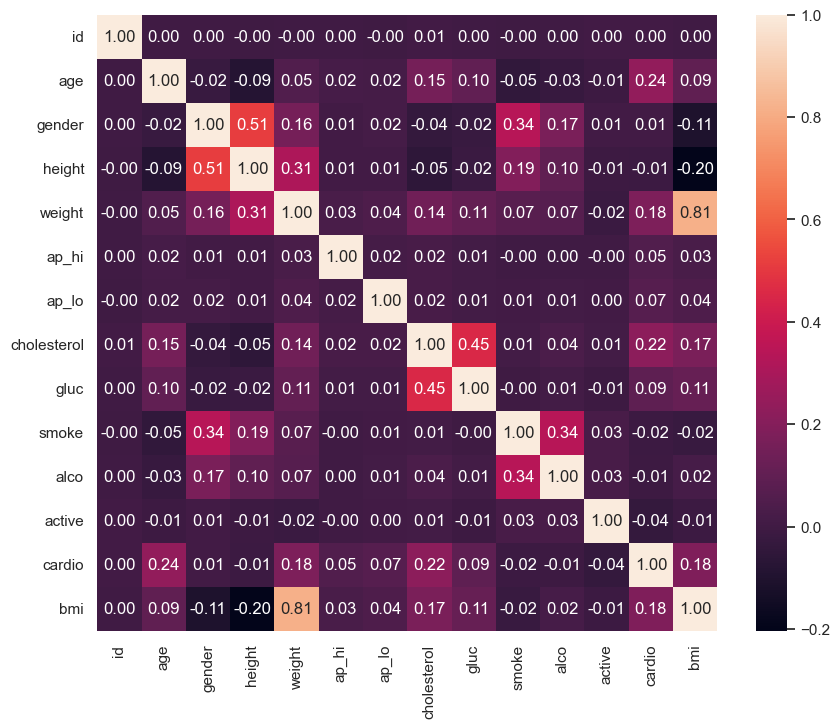

In [162]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cardio_data.corr(), annot=True, fmt=".2f")

In [165]:
blood_pressure_ranges_systolic = pd.cut(cardio_data['ap_hi'], bins=[0, 120, 130, 140, 160, 180, 250], labels=[1, 2, 3, 4, 5, 6])
blood_pressure_ranges_systolic = pd.DataFrame({'ap_hi': blood_pressure_ranges_systolic})

blood_pressure_ranges_diastolic = pd.cut(cardio_data['ap_lo'], bins=[0, 80, 85, 90, 100, 120], labels=[1, 2, 3, 4, 5])
blood_pressure_ranges_diastolic = pd.DataFrame({'ap_lo': blood_pressure_ranges_diastolic})